## Preprocessing dan Feature Engineering

## Import Package

In [47]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util

#Import package untuk balancing dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle
import os

In [48]:
params_dir = "config/config.yaml"

In [49]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [50]:
params = load_params(params_dir)

In [51]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

In [52]:
config_data = util.load_config()

## Read Data

In [53]:
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

X_valid = util.pickle_load(config_data["valid_set_path"][0])
y_valid = util.pickle_load(config_data["valid_set_path"][1])

X_test = util.pickle_load(config_data["test_set_path"][0])
y_test = util.pickle_load(config_data["test_set_path"][1])

In [54]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,768,Germany,Female,43,2,129264.05,2,0,0,19150.14
...,...,...,...,...,...,...,...,...,...,...
9785,455,France,Female,27,5,155879.09,2,0,0,70774.97
7763,614,Spain,Female,36,1,44054.84,1,1,1,73329.08
5218,685,France,Male,20,4,104719.94,2,1,0,38691.34
1346,643,France,Male,30,5,94443.77,1,1,1,165614.40


In [55]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,768,Germany,Female,43,2,129264.05,2,0,0,19150.14
...,...,...,...,...,...,...,...,...,...,...
9785,455,France,Female,27,5,155879.09,2,0,0,70774.97
7763,614,Spain,Female,36,1,44054.84,1,1,1,73329.08
5218,685,France,Male,20,4,104719.94,2,1,0,38691.34
1346,643,France,Male,30,5,94443.77,1,1,1,165614.40


In [56]:
#Menyatukan data X_train dan y_train untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
dataset = pd.concat([X_train, y_train], axis = 1)

#Menyatukan data X_valid dan y_valid untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
valid_set = pd.concat([X_valid, y_valid], axis = 1)

#Menyatukan data X_test dan y_test untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
test_set = pd.concat([X_test, y_test], axis = 1)

## Handling Missing Value

In [57]:
from sklearn.impute import SimpleImputer

def imputeData(data, numerical_columns_mean, numerical_columns_median, categorical_columns):
    """
    Fungsi untuk melakukan imputasi data numerik dan kategorikal
    :param data: <pandas dataframe> sample data input
    :param numerical_columns_mean: <list> list kolom numerik data yang akan diimputasi dengan mean
    :param numerical_columns_median: <list> list kolom numerik data yang akan diimputasi dengan median
    :param categorical_columns: <list> list kolom kategorikal data
    :return numerical_data_imputed: <pandas dataframe> data numerik imputed
    :return categorical_data_imputed: <pandas dataframe> data kategorikal imputed
    """
    # Imputasi kolom numerik dengan mean
    numerical_data_mean = data[numerical_columns_mean]
    imputer_numerical_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer_numerical_mean.fit(numerical_data_mean)
    imputed_data_mean = imputer_numerical_mean.transform(numerical_data_mean)
    numerical_data_imputed_mean = pd.DataFrame(imputed_data_mean, columns=numerical_columns_mean, index=numerical_data_mean.index)

    # Imputasi kolom numerik dengan median
    numerical_data_median = data[numerical_columns_median]
    imputer_numerical_median = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer_numerical_median.fit(numerical_data_median)
    imputed_data_median = imputer_numerical_median.transform(numerical_data_median)
    numerical_data_imputed_median = pd.DataFrame(imputed_data_median, columns=numerical_columns_median, index=numerical_data_median.index)

    # Gabungkan kedua data numerik yang telah diimputasi
    numerical_data_imputed = pd.concat([numerical_data_imputed_mean, numerical_data_imputed_median], axis=1)

    # Seleksi data kategorikal
    categorical_data = data[categorical_columns]

    # Imputasi dengan menggunakan modus
    mode = categorical_data.mode().iloc[0]

    # Lakukan imputasi untuk data kategorikal
    categorical_data_imputed = categorical_data.fillna(mode)

    # Gabungkan data numerik dan kategorikal yang telah diimputasi
    data_imputed = pd.concat([numerical_data_imputed, categorical_data_imputed], axis=1)

    return data_imputed

## Parameter Imputasi 

In [58]:
#Imputasi Data
numerical_column = ["Age"]
numerical_column_mean = ["CreditScore", "Balance", "EstimatedSalary"]
set_numerik = numerical_column + numerical_column_mean
dataset_column = list(X_train.columns)
categorical_column = list(set(dataset_column).difference(set(set_numerik)))

## Imputasi Data Train

In [59]:
X_train_impute = imputeData(data = X_train, 
                            numerical_columns_mean = numerical_column_mean, 
                            numerical_columns_median = numerical_column, 
                            categorical_columns = categorical_column)

In [60]:
X_train_impute

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Geography,Tenure,Gender
3144,648.0,81370.07,181534.04,55.0,1,0,1,Spain,1,Male
9939,693.0,0.00,135502.77,57.0,1,1,2,Spain,9,Female
7925,586.0,0.00,168261.40,33.0,1,1,2,Spain,7,Female
309,438.0,78398.69,44937.01,31.0,0,1,1,Germany,8,Male
9415,768.0,129264.05,19150.14,43.0,0,0,2,Germany,2,Female
...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,27.0,0,0,2,France,5,Female
7763,614.0,44054.84,73329.08,36.0,1,1,1,Spain,1,Female
5218,685.0,104719.94,38691.34,20.0,0,1,2,France,4,Male
1346,643.0,94443.77,165614.40,30.0,1,1,1,France,5,Male


## Imputasi Data Valid

In [61]:
X_valid_impute = imputeData(data = X_valid, 
                            numerical_columns_mean = numerical_column_mean, 
                            numerical_columns_median = numerical_column, 
                            categorical_columns = categorical_column)

In [62]:
X_valid_impute

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Geography,Tenure,Gender
9970,518.0,151027.05,119377.36,42.0,0,1,2,France,7,Male
30,591.0,0.00,140469.38,39.0,0,1,3,Spain,3,Female
7394,519.0,0.00,167553.06,22.0,1,0,1,France,8,Female
3471,632.0,107375.82,62703.38,27.0,1,1,1,France,3,Female
7844,612.0,0.00,9209.21,38.0,1,1,2,France,1,Female
...,...,...,...,...,...,...,...,...,...,...
4085,520.0,134007.90,193209.11,34.0,1,1,1,France,4,Male
681,591.0,128468.69,137254.55,58.0,1,0,1,Spain,5,Male
3983,626.0,0.00,173117.22,44.0,1,0,1,France,2,Female
6219,636.0,115137.26,52484.01,37.0,0,1,1,Spain,1,Male


## Imputasi Data Test

In [63]:
X_test_impute = imputeData(data = X_test, 
                           numerical_columns_mean = numerical_column_mean, 
                           numerical_columns_median = numerical_column, 
                           categorical_columns = categorical_column)

In [64]:
X_test_impute

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Geography,Tenure,Gender
2755,700.0,0.00,145151.96,31.0,1,0,2,Spain,7,Male
4997,722.0,0.00,44560.17,43.0,0,1,1,Spain,1,Male
6555,641.0,0.00,93148.93,35.0,0,1,2,France,5,Male
5552,627.0,0.00,132719.80,41.0,0,1,2,France,3,Male
796,702.0,98444.19,109563.28,46.0,1,0,1,France,9,Female
...,...,...,...,...,...,...,...,...,...,...
7089,635.0,0.00,136551.25,48.0,1,1,2,Spain,2,Female
1956,565.0,118803.35,128124.70,55.0,1,1,2,France,4,Male
7791,584.0,152622.34,99298.80,31.0,0,1,1,Germany,6,Female
8854,674.0,0.00,9574.83,39.0,1,1,2,Spain,6,Female


In [65]:
util.pickle_dump(X_train_impute, config_data["impute_data_train"][0])

In [66]:
util.pickle_dump(X_test_impute, config_data["impute_data_test"][0])

In [67]:
util.pickle_dump(X_valid_impute, config_data["impute_data_valid"][0])

## Get Dummies

In [68]:
def get_dummies(train_df, input_df):
    # Menggabungkan data train dan input menjadi satu DataFrame
    combined_df = pd.concat([train_df, input_df])
    
    # Mengubah variabel kategorikal menjadi variabel dummy
    dummies_df = pd.get_dummies(combined_df, columns=train_df.select_dtypes(include='object').columns)
    
    # Memisahkan kembali data train dan input
    train_dummies = dummies_df[:train_df.shape[0]]
    input_dummies = dummies_df[train_df.shape[0]:]
    
    return train_dummies, input_dummies

In [69]:
dataset_ohe, valid_set = get_dummies(X_train_impute, X_valid_impute)

In [70]:
dataset, test_set = get_dummies(X_train_impute, X_test_impute)

In [71]:
dataset

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3144,648.0,81370.07,181534.04,55.0,1,0,1,1,0,0,1,0,1
9939,693.0,0.00,135502.77,57.0,1,1,2,9,0,0,1,1,0
7925,586.0,0.00,168261.40,33.0,1,1,2,7,0,0,1,1,0
309,438.0,78398.69,44937.01,31.0,0,1,1,8,0,1,0,0,1
9415,768.0,129264.05,19150.14,43.0,0,0,2,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,27.0,0,0,2,5,1,0,0,1,0
7763,614.0,44054.84,73329.08,36.0,1,1,1,1,0,0,1,1,0
5218,685.0,104719.94,38691.34,20.0,0,1,2,4,1,0,0,0,1
1346,643.0,94443.77,165614.40,30.0,1,1,1,5,1,0,0,0,1


In [72]:
test_set

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2755,700.0,0.00,145151.96,31.0,1,0,2,7,0,0,1,0,1
4997,722.0,0.00,44560.17,43.0,0,1,1,1,0,0,1,0,1
6555,641.0,0.00,93148.93,35.0,0,1,2,5,1,0,0,0,1
5552,627.0,0.00,132719.80,41.0,0,1,2,3,1,0,0,0,1
796,702.0,98444.19,109563.28,46.0,1,0,1,9,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,635.0,0.00,136551.25,48.0,1,1,2,2,0,0,1,1,0
1956,565.0,118803.35,128124.70,55.0,1,1,2,4,1,0,0,0,1
7791,584.0,152622.34,99298.80,31.0,0,1,1,6,0,1,0,1,0
8854,674.0,0.00,9574.83,39.0,1,1,2,6,0,0,1,1,0


## Balancing Data

In [73]:
def ros_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 123)

    # Balancing set data
    x_ros, y_ros = ros.fit_resample(
        set_data.drop("Exited", axis = 1),
        set_data.Exited
    )

    # Concatenate balanced data
    set_data_ros = pd.concat(
        [x_ros, y_ros],
        axis = 1
    )

    # Return balanced data
    return set_data_ros

In [74]:
dataset = pd.concat([dataset, y_train],axis = 1)

In [75]:
dataset_ros = ros_fit_resample(dataset)

In [76]:
dataset_ros

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,648.0,81370.07,181534.04,55.0,1,0,1,1,0,0,1,0,1,0
1,693.0,0.00,135502.77,57.0,1,1,2,9,0,0,1,1,0,0
2,586.0,0.00,168261.40,33.0,1,1,2,7,0,0,1,1,0,0
3,438.0,78398.69,44937.01,31.0,0,1,1,8,0,1,0,0,1,0
4,768.0,129264.05,19150.14,43.0,0,0,2,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,572.0,97750.07,193014.26,51.0,1,1,3,8,0,1,0,0,1,1
11132,415.0,134950.19,178587.36,46.0,0,0,3,9,1,0,0,0,1,1
11133,805.0,116585.97,189428.75,45.0,0,1,1,9,0,1,0,1,0,1
11134,729.0,117837.43,104016.61,46.0,0,1,1,5,0,1,0,0,1,1


In [77]:
# Value Count dari Exited
dataset_ros.Exited.value_counts()

0    5568
1    5568
Name: Exited, dtype: int64

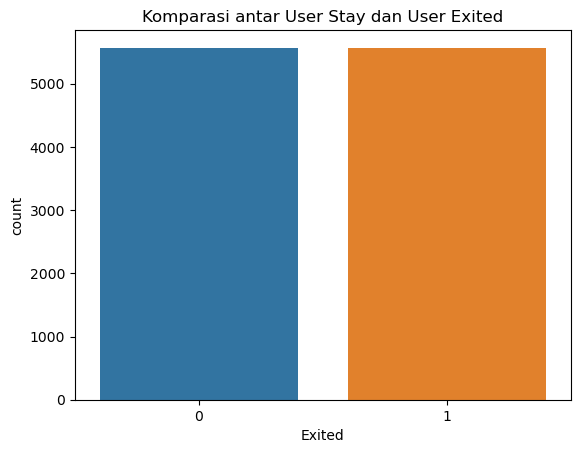

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset_ros, x="Exited")
plt.title('Komparasi antar User Stay dan User Exited')
#plt.savefig('Komparasi_stay_exited_ros.png')
plt.show()

## Standart Scaler

In [79]:
columns_to_scale = ["CreditScore", "Age", "EstimatedSalary", "Balance"]
#"Tenure",

def fit_scaler(train_data):
    scaler = StandardScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # save scaler
    with open('model/5 - Model Final/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    # load scaler
    file_path = os.path.join(folder_path, 'scaler.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [80]:
scaler = fit_scaler(dataset_ros)

In [81]:
scaling = load_scaler('model/5 - Model Final/')

In [82]:
dataset_clean = transform_data(dataset_ros, scaling)
X_valid_clean = transform_data(valid_set, scaling)
X_test_clean = transform_data(test_set, scaling)

In [83]:
dataset_clean

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,0.003435,-0.011981,1.409191,1.306988,1,0,1,1,0,0,1,0,1,0
1,0.463506,-1.336548,0.610455,1.493860,1,1,2,9,0,0,1,1,0,0
2,-0.630442,-1.336548,1.178883,-0.748604,1,1,2,7,0,0,1,1,0,0
3,-2.143566,-0.060350,-0.961045,-0.935476,0,1,1,8,0,1,0,0,1,0
4,1.230292,0.767652,-1.408500,0.185756,0,0,2,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,-0.773575,0.254658,1.608396,0.933244,1,1,3,8,0,1,0,0,1,1
11132,-2.378714,0.860213,1.358060,0.466064,0,0,3,9,1,0,0,0,1,1
11133,1.608573,0.561275,1.546180,0.372628,0,1,1,9,0,1,0,1,0,1
11134,0.831564,0.581646,0.064106,0.466064,0,1,1,5,0,1,0,0,1,1


In [84]:
X_valid_clean

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9970,-1.325661,1.121917,0.330646,0.092320,0,1,2,7,1,0,0,0,1
30,-0.579323,-1.336548,0.696635,-0.187988,0,1,3,3,0,0,1,1,0
7394,-1.315437,-1.336548,1.166592,-1.776400,1,0,1,8,1,0,0,1,0
3471,-0.160146,0.411349,-0.652763,-1.309220,1,1,1,3,1,0,0,1,0
7844,-0.364623,-1.336548,-1.580995,-0.281424,1,1,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,-1.305214,0.844874,1.611777,-0.655168,1,1,1,4,1,0,0,0,1
681,-0.579323,0.754705,0.640851,1.587296,1,0,1,5,0,0,1,0,1
3983,-0.221489,-1.336548,1.263142,0.279192,1,0,1,2,1,0,0,1,0
6219,-0.119251,0.537692,-0.830090,-0.374860,0,1,1,1,0,0,1,0,1


In [85]:
X_test_clean

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2755,0.535073,-1.336548,0.777888,-0.935476,1,0,2,7,0,0,1,0,1
4997,0.759997,-1.336548,-0.967584,0.185756,0,1,1,1,0,0,1,0,1
6555,-0.068132,-1.336548,-0.124471,-0.561732,0,1,2,5,1,0,0,0,1
5552,-0.211266,-1.336548,0.562164,-0.001116,0,1,2,3,1,0,0,0,1
796,0.555521,0.265957,0.160352,0.466064,1,0,1,9,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,-0.129475,-1.336548,0.628648,0.652936,1,1,2,2,0,0,1,1,0
1956,-0.845142,0.597370,0.482430,1.306988,1,1,2,4,1,0,0,0,1
7791,-0.650890,1.147886,-0.017758,-0.935476,0,1,1,6,0,1,0,1,0
8854,0.269254,-1.336548,-1.574651,-0.187988,1,1,2,6,0,0,1,1,0


In [86]:
X_ros_clean = dataset_clean.drop(columns = "Exited")
y_ros = dataset_clean["Exited"]

In [87]:
X_ros_clean

,CreditScore,Balance,EstimatedSalary,Age,IsActiveMember,HasCrCard,NumOfProducts,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.003435,-0.011981,1.409191,1.306988,1,0,1,1,0,0,1,0,1
1,0.463506,-1.336548,0.610455,1.493860,1,1,2,9,0,0,1,1,0
2,-0.630442,-1.336548,1.178883,-0.748604,1,1,2,7,0,0,1,1,0
3,-2.143566,-0.060350,-0.961045,-0.935476,0,1,1,8,0,1,0,0,1
4,1.230292,0.767652,-1.408500,0.185756,0,0,2,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,-0.773575,0.254658,1.608396,0.933244,1,1,3,8,0,1,0,0,1
11132,-2.378714,0.860213,1.358060,0.466064,0,0,3,9,1,0,0,0,1
11133,1.608573,0.561275,1.546180,0.372628,0,1,1,9,0,1,0,1,0
11134,0.831564,0.581646,0.064106,0.466064,0,1,1,5,0,1,0,0,1


In [88]:
X_ros_clean = X_ros_clean[sorted(X_ros_clean.columns)]
X_valid_clean = X_valid_clean[sorted(X_valid_clean.columns)]
X_test_clean = X_test_clean[sorted(X_test_clean.columns)]

In [89]:
X_ros_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1.306988,-0.011981,0.003435,1.409191,0,1,0,0,1,0,1,1,1
1,1.493860,-1.336548,0.463506,0.610455,1,0,0,0,1,1,1,2,9
2,-0.748604,-1.336548,-0.630442,1.178883,1,0,0,0,1,1,1,2,7
3,-0.935476,-0.060350,-2.143566,-0.961045,0,1,0,1,0,1,0,1,8
4,0.185756,0.767652,1.230292,-1.408500,1,0,0,1,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,0.933244,0.254658,-0.773575,1.608396,0,1,0,1,0,1,1,3,8
11132,0.466064,0.860213,-2.378714,1.358060,0,1,1,0,0,0,0,3,9
11133,0.372628,0.561275,1.608573,1.546180,1,0,0,1,0,1,0,1,9
11134,0.466064,0.581646,0.831564,0.064106,0,1,0,1,0,1,0,1,5


In [90]:
X_valid_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
9970,0.092320,1.121917,-1.325661,0.330646,0,1,1,0,0,1,0,2,7
30,-0.187988,-1.336548,-0.579323,0.696635,1,0,0,0,1,1,0,3,3
7394,-1.776400,-1.336548,-1.315437,1.166592,1,0,1,0,0,0,1,1,8
3471,-1.309220,0.411349,-0.160146,-0.652763,1,0,1,0,0,1,1,1,3
7844,-0.281424,-1.336548,-0.364623,-1.580995,1,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,-0.655168,0.844874,-1.305214,1.611777,0,1,1,0,0,1,1,1,4
681,1.587296,0.754705,-0.579323,0.640851,0,1,0,0,1,0,1,1,5
3983,0.279192,-1.336548,-0.221489,1.263142,1,0,1,0,0,0,1,1,2
6219,-0.374860,0.537692,-0.119251,-0.830090,0,1,0,0,1,1,0,1,1


In [91]:
X_test_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
2755,-0.935476,-1.336548,0.535073,0.777888,0,1,0,0,1,0,1,2,7
4997,0.185756,-1.336548,0.759997,-0.967584,0,1,0,0,1,1,0,1,1
6555,-0.561732,-1.336548,-0.068132,-0.124471,0,1,1,0,0,1,0,2,5
5552,-0.001116,-1.336548,-0.211266,0.562164,0,1,1,0,0,1,0,2,3
796,0.466064,0.265957,0.555521,0.160352,1,0,1,0,0,0,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,0.652936,-1.336548,-0.129475,0.628648,1,0,0,0,1,1,1,2,2
1956,1.306988,0.597370,-0.845142,0.482430,0,1,1,0,0,1,1,2,4
7791,-0.935476,1.147886,-0.650890,-0.017758,1,0,0,1,0,1,0,1,6
8854,-0.187988,-1.336548,0.269254,-1.574651,1,0,0,0,1,1,1,2,6


## Save Data

In [92]:
util.pickle_dump(X_ros_clean, config_data["standar_scaler_ros"][0])
util.pickle_dump(y_ros, config_data["standar_scaler_ros"][1])
    
util.pickle_dump(X_test_clean, config_data["standar_scaler_test"][0])
util.pickle_dump(y_test, config_data["standar_scaler_test"][1])

util.pickle_dump(X_valid_clean, config_data["standar_scaler_valid"][0])
util.pickle_dump(y_valid, config_data["standar_scaler_valid"][1])